In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import proplot as plot
import warnings
warnings.filterwarnings("ignore")

In [37]:
np.random.seed(seed = 45)

Full catalogue of cosmologically physical simulated objects with: $3 < m_{AB} < 30$

In [2]:
catalogue_df = pd.read_csv('observable_full.csv')
catalogue_df.describe()

,For_key_ID,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,z,t/Gyr,M*,M_initial,Z,SFH,tau/Gyr,Av_law,Av,t_l
count,2.997800e+05,299780.000000,299780.000000,299780.000000,299780.000000,299780.000000,299780.000000,299780.000000,299780.000000,299780.000000,299780.000000,299780.000000,299780.000000,2.997800e+05,299780.000000,299780.0,299780.000000,299780.000000,299780.000000,299780.000000
mean,5.696185e+05,24.072573,23.215419,22.530904,22.219219,22.043797,22.309922,21.793952,21.570473,21.352316,2.227260,0.694681,0.792013,1.000000e+10,-0.004059,1.0,3.140375,0.708870,0.424263,8.923661
std,2.696369e+05,3.622014,3.235429,2.915775,2.789982,2.741853,2.826388,2.708483,2.676455,2.651841,1.718549,1.703051,0.119508,0.000000e+00,0.258078,0.0,3.659205,0.454284,0.404568,3.674566
min,1.177800e+04,7.890100,8.120200,8.446700,8.563700,8.618100,8.512800,8.551300,8.597000,8.581800,0.010000,0.001000,0.528200,1.000000e+10,-0.300000,1.0,0.100000,0.000000,0.000000,0.142799
25%,2.932508e+05,21.613200,21.064900,20.680300,20.521700,20.450975,20.570600,20.351700,20.253600,20.126100,0.700000,0.020000,0.695400,1.000000e+10,-0.300000,1.0,0.100000,0.000000,0.000000,6.471055
50%,6.096565e+05,24.409050,23.529300,22.759050,22.396100,22.229100,22.520850,22.036850,21.891100,21.747400,1.870000,0.060000,0.816000,1.000000e+10,0.000000,1.0,1.000000,1.000000,0.400000,10.273427
75%,7.744282e+05,26.959000,25.713700,24.745700,24.311900,24.073000,24.440300,23.757100,23.457200,23.170600,3.530000,0.500000,0.875500,1.000000e+10,0.300000,1.0,3.000000,1.000000,0.600000,11.990400
max,1.012821e+06,29.999800,29.584000,29.191300,28.859700,28.353100,28.894500,27.741200,27.271100,26.627100,6.000000,13.000000,0.984500,1.000000e+10,0.300000,1.0,10.000000,1.000000,2.200000,12.844603


In [3]:
limiting_mags = {
    'LSST_u': 24.2,
    'LSST_g': 24.5,
    'LSST_r': 23.9,
    'LSST_i': 23.6,
    'LSST_z': 23.4,
    'VIS': 24.5,
    'NISP_Y': 23.0,
    'NISP_J': 23.0,
    'NISP_H': 23.0
}

Let's confine this catalogue to a more reasonable range of magnitudes:

In [4]:
observable_df = catalogue_df[(catalogue_df.VIS > 15) & (catalogue_df.VIS < limiting_mags['VIS'])]

In [5]:
observable_df.describe()

,For_key_ID,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,z,t/Gyr,M*,M_initial,Z,SFH,tau/Gyr,Av_law,Av,t_l
count,2.222240e+05,222224.000000,222224.000000,222224.000000,222224.000000,222224.000000,222224.000000,222224.000000,222224.000000,222224.000000,222224.000000,222224.000000,222224.00000,2.222240e+05,222224.000000,222224.0,222224.000000,222224.000000,222224.000000,222224.000000
mean,5.652114e+05,23.015377,22.229819,21.604706,21.333714,21.189879,21.412416,20.993435,20.832069,20.689515,2.064151,0.668360,0.81128,1.000000e+10,-0.006484,1.0,3.143898,0.672461,0.395172,8.504003
std,2.634492e+05,2.963285,2.509042,2.148322,2.030781,2.010261,2.065342,2.049592,2.106780,2.182336,1.719720,1.849262,0.11883,0.000000e+00,0.259196,0.0,3.684967,0.469317,0.411710,3.783656
min,1.177800e+04,14.043500,14.391600,14.824300,14.808900,13.901300,15.000600,12.398200,11.223600,10.153900,0.010000,0.001000,0.52820,1.000000e+10,-0.300000,1.0,0.100000,0.000000,0.000000,0.142799
25%,2.968668e+05,20.934600,20.499900,20.209400,20.117500,20.041600,20.136100,19.916700,19.761075,19.578100,0.540000,0.010000,0.72790,1.000000e+10,-0.300000,1.0,0.100000,0.000000,0.000000,5.464003
50%,6.061545e+05,23.252100,22.459700,21.846900,21.605100,21.473300,21.679800,21.315700,21.179250,21.137700,1.580000,0.050000,0.82650,1.000000e+10,0.000000,1.0,1.000000,1.000000,0.400000,9.688944
75%,7.679572e+05,25.177400,24.164100,23.334900,22.936600,22.722950,23.060700,22.477925,22.332400,22.250600,3.360000,0.300000,0.91400,1.000000e+10,0.300000,1.0,3.000000,1.000000,0.600000,11.885764
max,1.012821e+06,29.999500,27.787900,25.651900,24.551900,24.593400,24.499900,24.678600,24.705100,24.736000,6.000000,13.000000,0.98450,1.000000e+10,0.300000,1.0,10.000000,1.000000,2.200000,12.844603


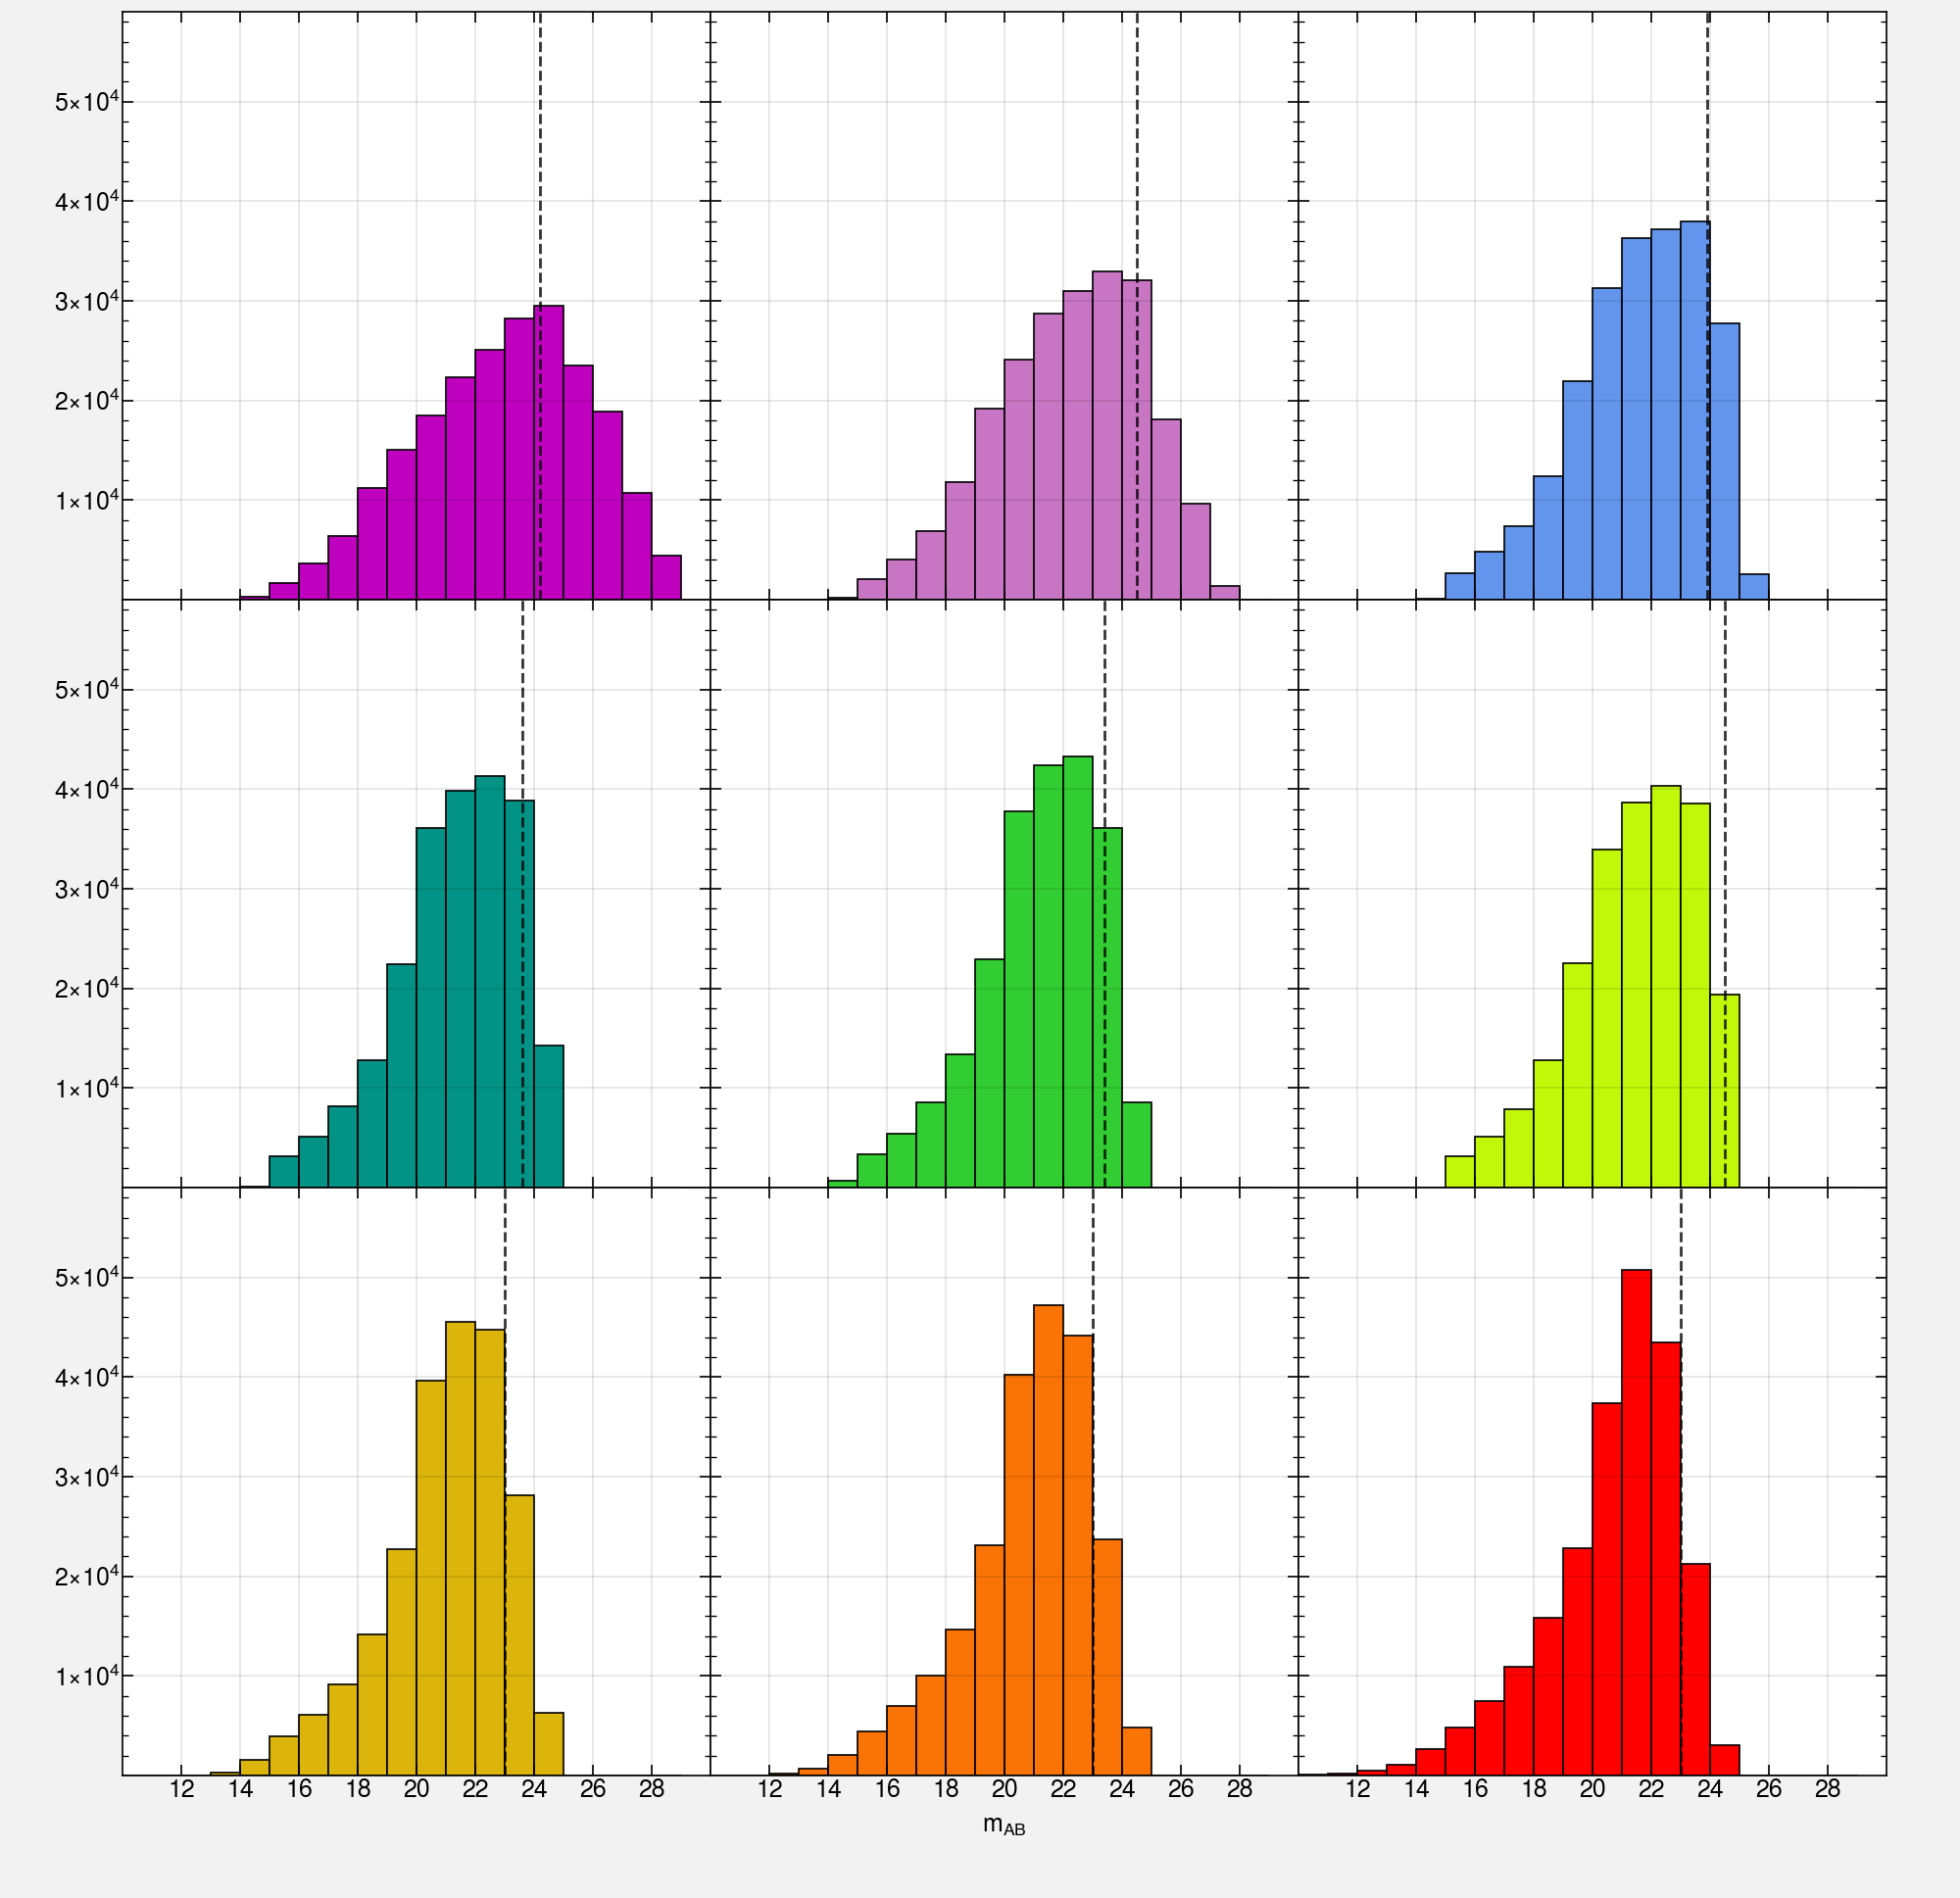

In [6]:
bins = np.linspace(10, 29, 20)

fig, axs = plot.subplots(ncols=3, nrows=3, axwidth=3, wspace=(0, 0), hspace=(0, 0), bottom='5em', right='3em', left='5em')

axs[0].hist(observable_df['LSST_u'], bins, color='m')
axs[0].axvline(x=limiting_mags['LSST_u'],color='black',linestyle='--',linewidth=1, alpha=0.8)

axs[1].hist(observable_df['LSST_g'], bins, color='orchid')
axs[1].axvline(x=limiting_mags['LSST_g'],color='black',linestyle='--',linewidth=1, alpha=0.8)

axs[2].hist(observable_df['LSST_r'], bins, color='cornflowerblue')
axs[2].axvline(x=limiting_mags['LSST_r'],color='black',linestyle='--',linewidth=1, alpha=0.8)

axs[3].hist(observable_df['LSST_i'], bins, color='teal')
axs[3].axvline(x=limiting_mags['LSST_i'],color='black',linestyle='--',linewidth=1, alpha=0.8)

axs[4].hist(observable_df['LSST_z'], bins, color='limegreen')
axs[4].axvline(x=limiting_mags['LSST_z'],color='black',linestyle='--',linewidth=1, alpha=0.8)

axs[5].hist(observable_df['VIS'], bins, color='chartreuse')
axs[5].axvline(x=limiting_mags['VIS'],color='black',linestyle='--',linewidth=1, alpha=0.8)

axs[6].hist(observable_df['NISP_Y'], bins, color='gold')
axs[6].axvline(x=limiting_mags['NISP_Y'],color='black',linestyle='--',linewidth=1, alpha=0.8)

axs[7].hist(observable_df['NISP_J'], bins, color='orange')
axs[7].axvline(x=limiting_mags['NISP_J'],color='black',linestyle='--',linewidth=1, alpha=0.8)

axs[8].hist(observable_df['NISP_H'], bins, color='r')
axs[8].axvline(x=limiting_mags['NISP_H'],color='black',linestyle='--',linewidth=1, alpha=0.8)

axs.format(xlim=(10, 30), ylim=(1, 5.9e4), yformatter='sci', xlabel='$m_{AB}$', xticks=np.arange(12,30,2), xformatter='simple',
           xtickloc='both', ytickloc='both', xtickdir='in', ytickdir='in')
#plt.savefig('mags_hist.png', format='png', dpi=250)

## Applying photometric errors (but hopefully correctly this time)

We should reach a S/N = 10 as a limit. Signal and noise are referred to in fluxes, however, so I'll have to convert the magnitudes into fluxes. But this is beneficial! Here's how Micol explained it:

This is also useful because in reality the Gaussian distribution of errors is expected on fluxes, not on their logarithm. So, you will have $f_{lim}$ derived from $m_{lim}$, and you know that $f_{lim}/\Delta f = 10$, from which you obtain $\Delta f$. This is the number you can use as sigma for your Gaussian distribution of noise to be applied on fluxes. So, if `f` is the flux you have from the model SEDs, you obtain `fobs=f+np.random.normal(0,Δf)`. Then you have to convert back fluxes and errors in magnitudes.


## Converting from Magnitudes to Flux ($\mu$Jy)

$$m_{AB} = -2.5 \log_{10}f + 23.9$$

$$f = 10^{-0.4(m_{AB} -23.9)}$$



$$\frac{f}{\Delta f} = 10$$ 
$$\Delta f_{lim} = \frac{f_{lim}}{10} = S/N$$

$$f_{obs} = f + \frac{1}{\Delta f \sqrt{2 \pi}} exp \frac{f^2}{2 \Delta f^2}$$

$$m_{obs} = -2.5 \log_{10}f_{obs} + 23.9$$

$$\Delta m = \frac{2.5}{\ln(10) \frac{\Delta f }{f}} $$

In [20]:
limiting_fluxes = limiting_mags.copy()
for band in limiting_fluxes.keys():
    limiting_fluxes[band] = 10**(-0.4*(limiting_mags[band] - 23.9))

In [21]:
limiting_fluxes

{'LSST_u': 0.7585775750291832,
 'LSST_g': 0.5754399373371561,
 'LSST_r': 1.0,
 'LSST_i': 1.3182567385564037,
 'LSST_z': 1.5848931924611136,
 'VIS': 0.5754399373371561,
 'NISP_Y': 2.29086765276777,
 'NISP_J': 2.29086765276777,
 'NISP_H': 2.29086765276777}

In [29]:
SNR = 10

In [30]:
lim_flux_err = limiting_fluxes.copy()
for band in lim_flux_err.keys():
    lim_flux_err[band] = lim_flux_err[band]/SNR

In [31]:
lim_flux_err

{'LSST_u': 0.07585775750291832,
 'LSST_g': 0.05754399373371562,
 'LSST_r': 0.1,
 'LSST_i': 0.13182567385564037,
 'LSST_z': 0.15848931924611137,
 'VIS': 0.05754399373371562,
 'NISP_Y': 0.22908676527677702,
 'NISP_J': 0.22908676527677702,
 'NISP_H': 0.22908676527677702}

In [34]:
lim_mag_err = lim_flux_err.copy()
for band in lim_flux_err.keys():
    lim_mag_err[band] = (2.5/np.log(10.))*np.abs(lim_flux_err[band]/limiting_fluxes[band])

In [35]:
lim_mag_err

{'LSST_u': 0.10857362047581293,
 'LSST_g': 0.10857362047581294,
 'LSST_r': 0.10857362047581294,
 'LSST_i': 0.10857362047581294,
 'LSST_z': 0.10857362047581294,
 'VIS': 0.10857362047581294,
 'NISP_Y': 0.10857362047581294,
 'NISP_J': 0.10857362047581294,
 'NISP_H': 0.10857362047581294}

In [41]:
def AB_to_flux(AB):
    f=np.ones(len(AB))
    f = pow(10.0, -0.4*(np.asarray(AB) - 23.9))
    return f

In [42]:
def flux_to_AB(flux):
    #m=np.ones(len(flux))*99.0
    #i=np.where(flux>0.0) 
    #m[i]=-2.5*np.log10(flux[i])+23.9
    m=-2.5*np.log10(flux)+23.9
    np.nan_to_num(m,copy=False,nan=99.0,posinf=None,neginf=None)
    return m

In [50]:
phot_errors_df = observable_df.copy()
for band in lim_flux_err.keys():
    band_mags = phot_errors_df[band]
    band_flux = AB_to_flux(band_mags)
    
    noise = np.random.normal(0, lim_flux_err[band], len(band_flux))
    
    flux_obs = band_flux + noise
    
    flux_err = lim_flux_err[band]
    
    mag_obs = flux_to_AB(flux_obs)
    
    dmag = (2.5/np.log(10.))*(flux_err/flux_obs)
    
    phot_errors_df[band] = mag_obs
    phot_errors_df['delta_'+ band] = dmag

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 2.19361e+05, 2.68900e+03, 1.15

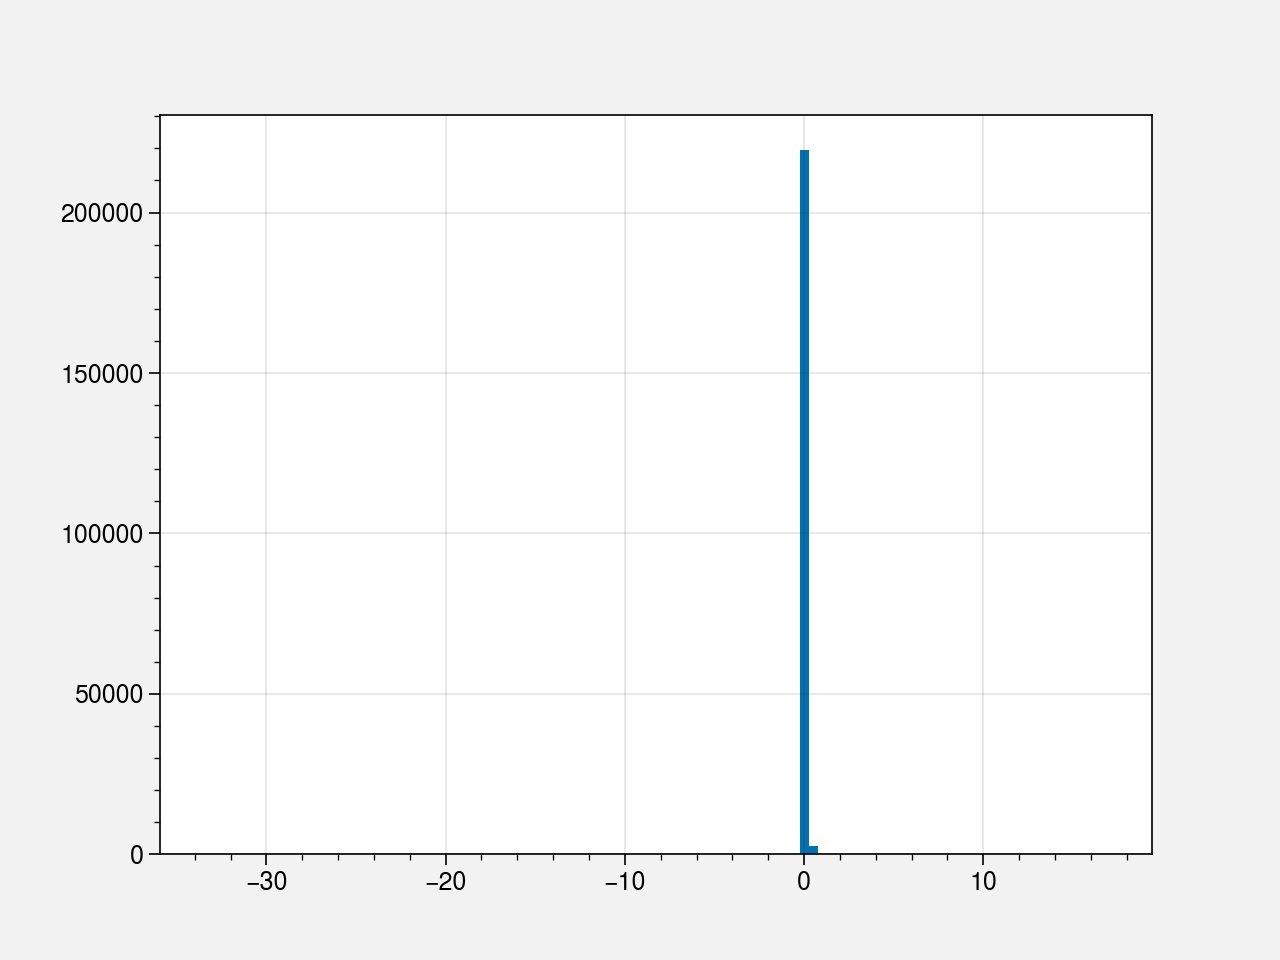

In [64]:
plt.hist(dmag, bins=100)

In [46]:
phot_errors_df

,For_key_ID,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,...,physical,delta_LSST_u,delta_LSST_g,delta_LSST_r,delta_LSST_i,delta_LSST_z,delta_VIS,delta_NISP_Y,delta_NISP_J,delta_NISP_H
0,11778,24.571920,21.256126,18.818682,17.187289,16.159936,17.374406,14.819319,13.864731,13.129806,...,True,0.152930,0.005472,0.001007,0.000296,0.000138,0.000153,0.000058,0.000024,0.000012
1,11779,25.743314,22.889837,20.421251,18.776201,17.739589,18.960821,16.378911,15.409952,14.663042,...,True,0.449832,0.024641,0.004408,0.001277,0.000591,0.000661,0.000244,0.000100,0.000050
2,11780,27.514773,23.916178,21.391581,19.744081,18.693808,19.923679,17.314052,16.330048,15.571480,...,True,2.299500,0.063415,0.010774,0.003114,0.001423,0.001604,0.000577,0.000233,0.000116
3,11781,99.000000,24.638267,22.116481,20.448002,19.394251,20.635336,17.992564,16.994299,16.224089,...,True,0.872652,0.123319,0.021005,0.005956,0.002713,0.003089,0.001078,0.000430,0.000212
4,11782,99.000000,25.089923,22.706223,21.042618,19.950262,21.194546,18.530964,17.520146,16.736582,...,True,6.224002,0.186936,0.036159,0.010298,0.004527,0.005171,0.001771,0.000698,0.000339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299775,1012817,19.462021,17.539943,16.259357,15.467635,14.937799,15.675694,14.297670,13.788974,13.340033,...,True,0.001382,0.000179,0.000095,0.000061,0.000045,0.000032,0.000036,0.000022,0.000015
299776,1012818,21.050561,19.107307,17.814267,17.014683,16.487585,17.226157,15.831865,15.321330,14.859662,...,True,0.005970,0.000756,0.000399,0.000252,0.000187,0.000134,0.000147,0.000092,0.000060
299777,1012819,22.031623,20.047351,18.743953,17.937532,17.413983,18.152222,16.742041,16.228292,15.756990,...,True,0.014736,0.001797,0.000940,0.000590,0.000438,0.000314,0.000341,0.000212,0.000138
299778,1012820,22.710945,20.730028,19.419530,18.603532,18.081009,18.822281,17.396237,16.879011,16.395918,...,True,0.027549,0.003371,0.001752,0.001089,0.000809,0.000582,0.000623,0.000387,0.000248


In [184]:
# -----------

In [185]:
# old cell
#for name in lim_flux_err.keys():
#    mag = phot_errors_df[name]
#    flux = AB_to_flux(mag)
#    noise = np.random.normal(0, lim_flux_err[name])
#    flux_obs = flux + noise
#    flux_err = lim_flux_err[name]
#    mag_obs = flux_to_AB(flux_obs)
#    dmag = (2.5/np.log(10.))*np.abs(flux_err/flux)
#    phot_errors_df[name] = mag_obs
#    phot_errors_df['delta_'+ name] = dmag

## Errors visualised

<Figure size 640x480 with 0 Axes>

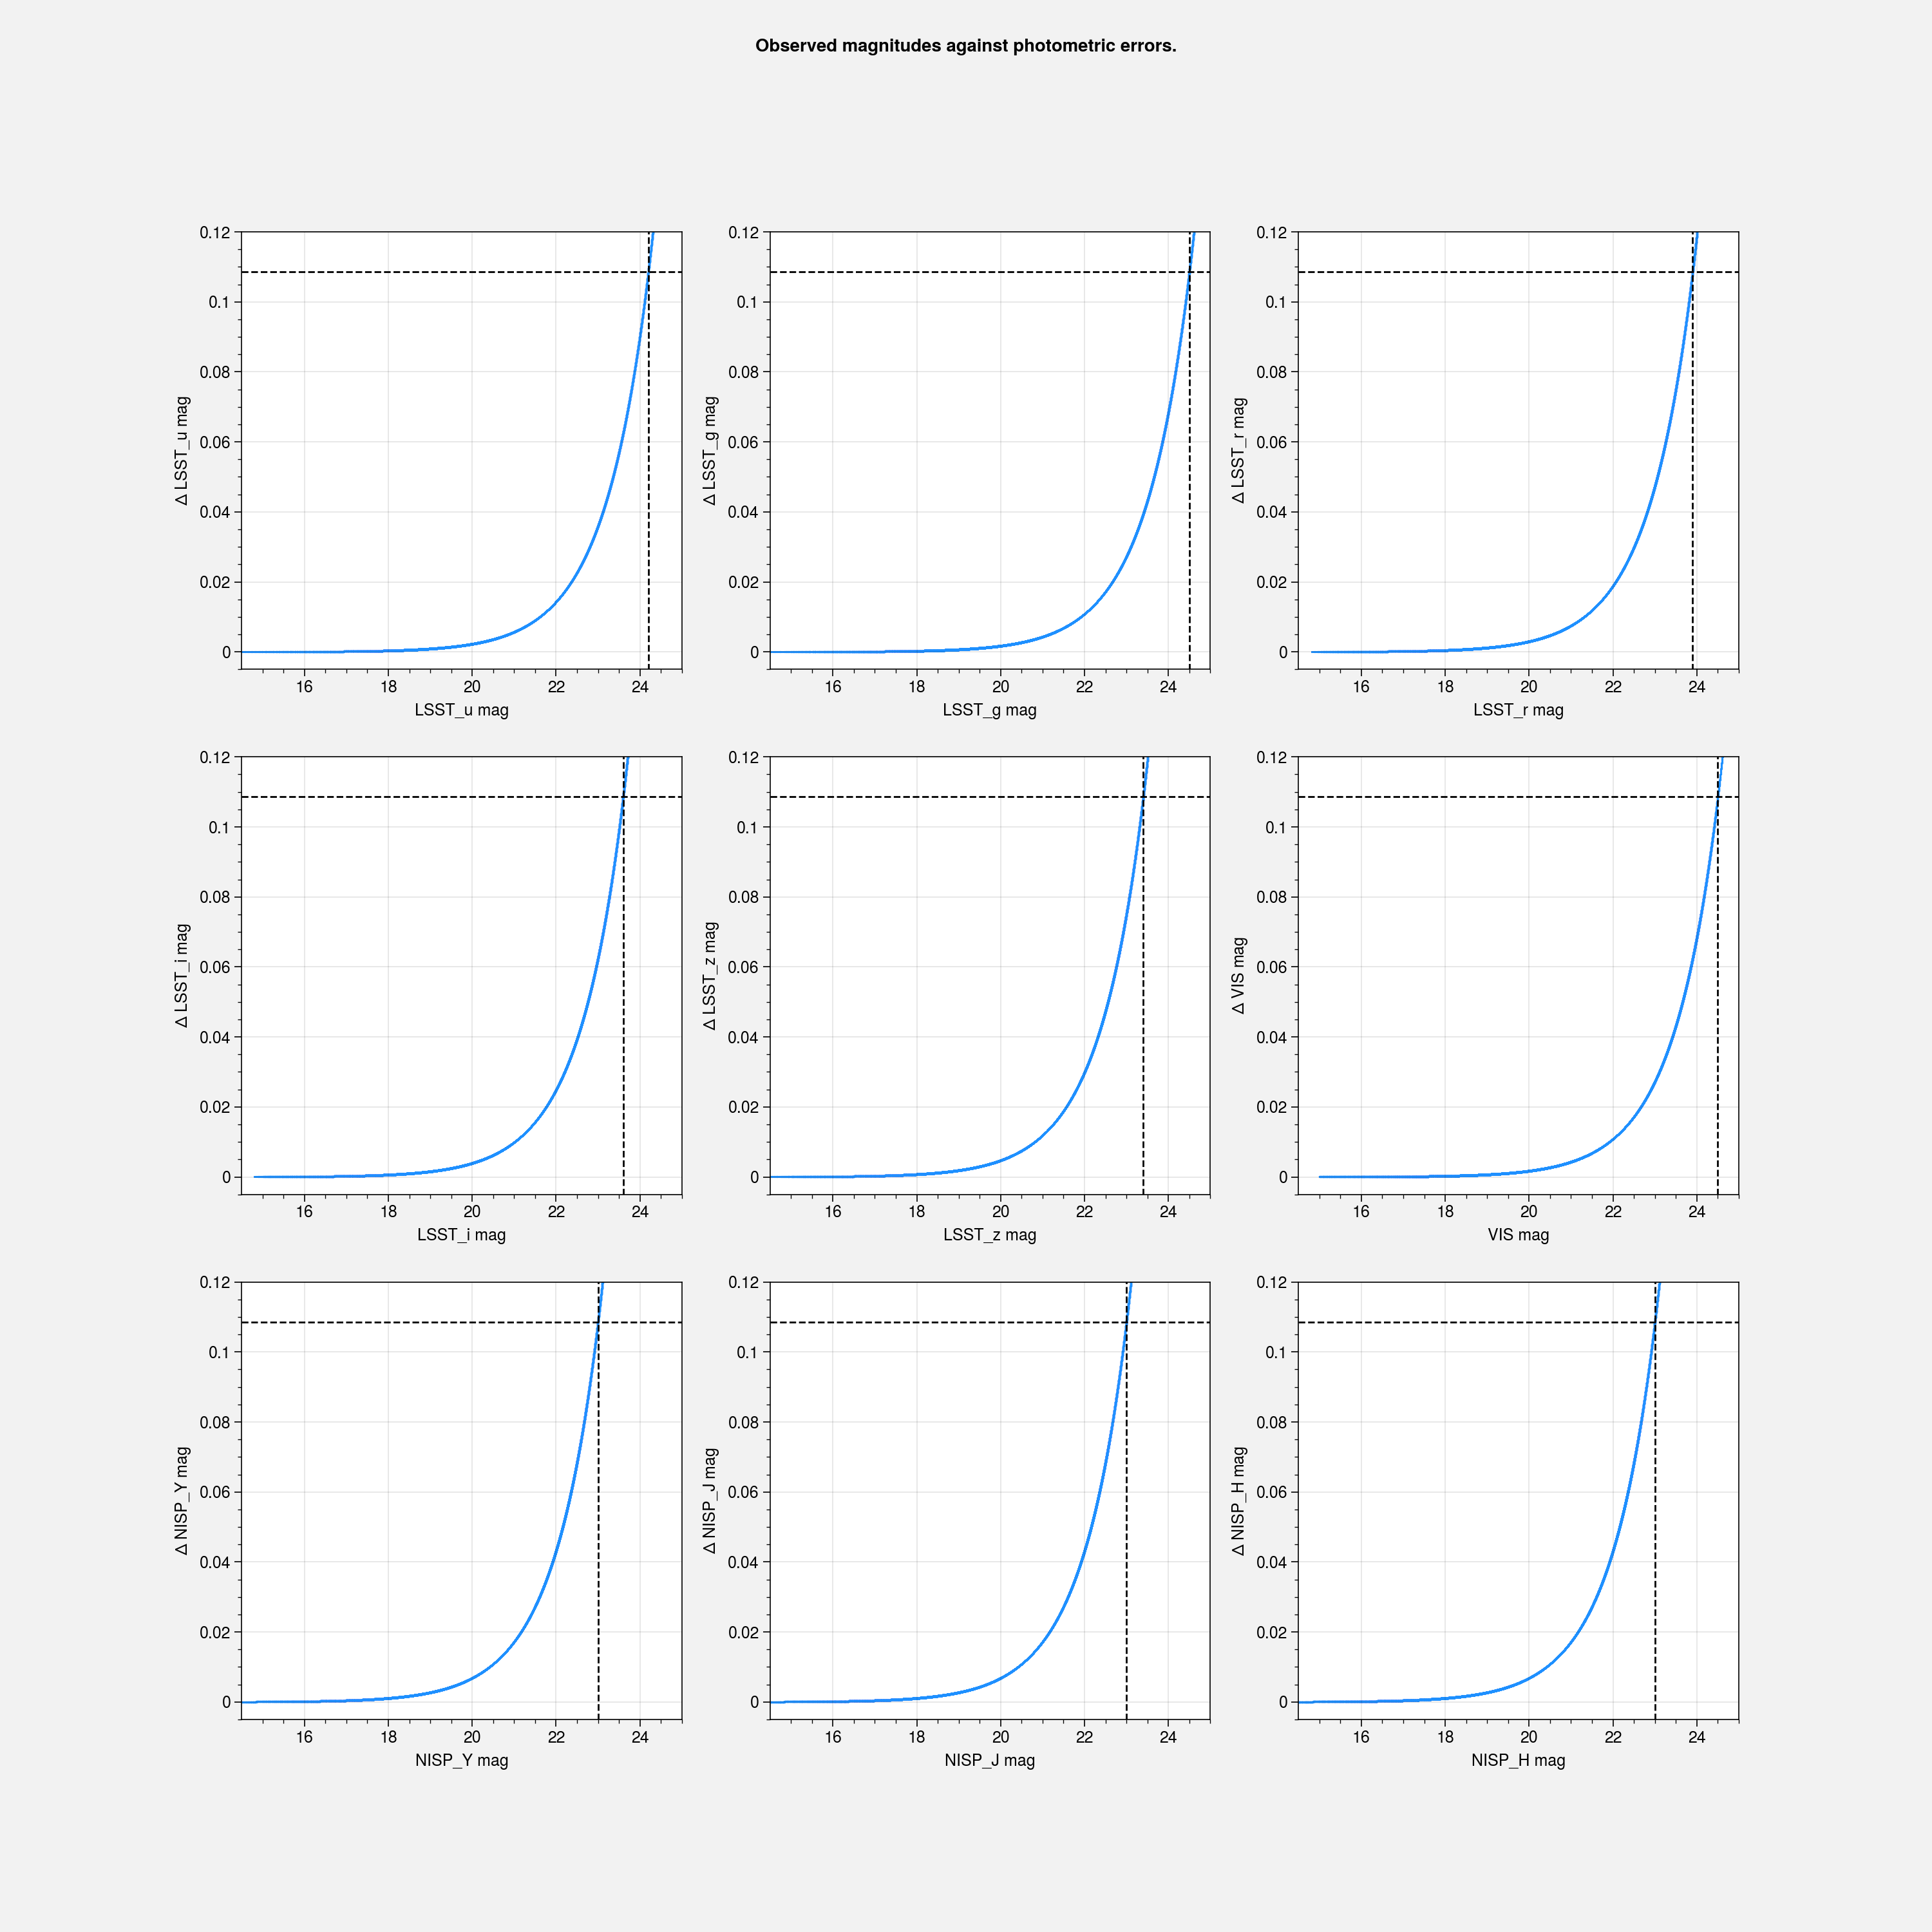

In [51]:
plt.clf()
plt.figure(figsize=(15,15))
plt.suptitle('Observed magnitudes against photometric errors.')
plt.subplot(331)
plt.scatter(phot_errors_df['LSST_u'], phot_errors_df['delta_LSST_u'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_u'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
#plt.xlim([23.5, 25])
#plt.ylim([0.05, 0.12])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_u mag')
plt.ylabel(r'$\Delta$ LSST_u mag')

plt.subplot(332)
plt.scatter(phot_errors_df['LSST_g'], phot_errors_df['delta_LSST_g'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_g'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_g mag')
plt.ylabel(r'$\Delta$ LSST_g mag')

plt.subplot(333)
plt.scatter(phot_errors_df['LSST_r'], phot_errors_df['delta_LSST_r'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_r'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_r mag')
plt.ylabel(r'$\Delta$ LSST_r mag')

plt.subplot(334)
plt.scatter(phot_errors_df['LSST_i'], phot_errors_df['delta_LSST_i'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_i'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_i mag')
plt.ylabel(r'$\Delta$ LSST_i mag')

plt.subplot(335)
plt.scatter(phot_errors_df['LSST_z'], phot_errors_df['delta_LSST_z'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_z'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_z mag')
plt.ylabel(r'$\Delta$ LSST_z mag')

plt.subplot(336)
plt.scatter(phot_errors_df['VIS'], phot_errors_df['delta_VIS'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['VIS'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('VIS mag')
plt.ylabel(r'$\Delta$ VIS mag')

plt.subplot(337)
plt.scatter(phot_errors_df['NISP_Y'], phot_errors_df['delta_NISP_Y'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_Y'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_Y mag')
plt.ylabel(r'$\Delta$ NISP_Y mag')

plt.subplot(338)
plt.scatter(phot_errors_df['NISP_J'], phot_errors_df['delta_NISP_J'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_J'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_J mag')
plt.ylabel(r'$\Delta$ NISP_J mag')

plt.subplot(339)
plt.scatter(phot_errors_df['NISP_H'], phot_errors_df['delta_NISP_H'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_H'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_H mag')
plt.ylabel(r'$\Delta$ NISP_H mag')
plt.show()
#plt.savefig('observed_mags_v_delmags.png', format='png', dpi=250, facecolor='w')

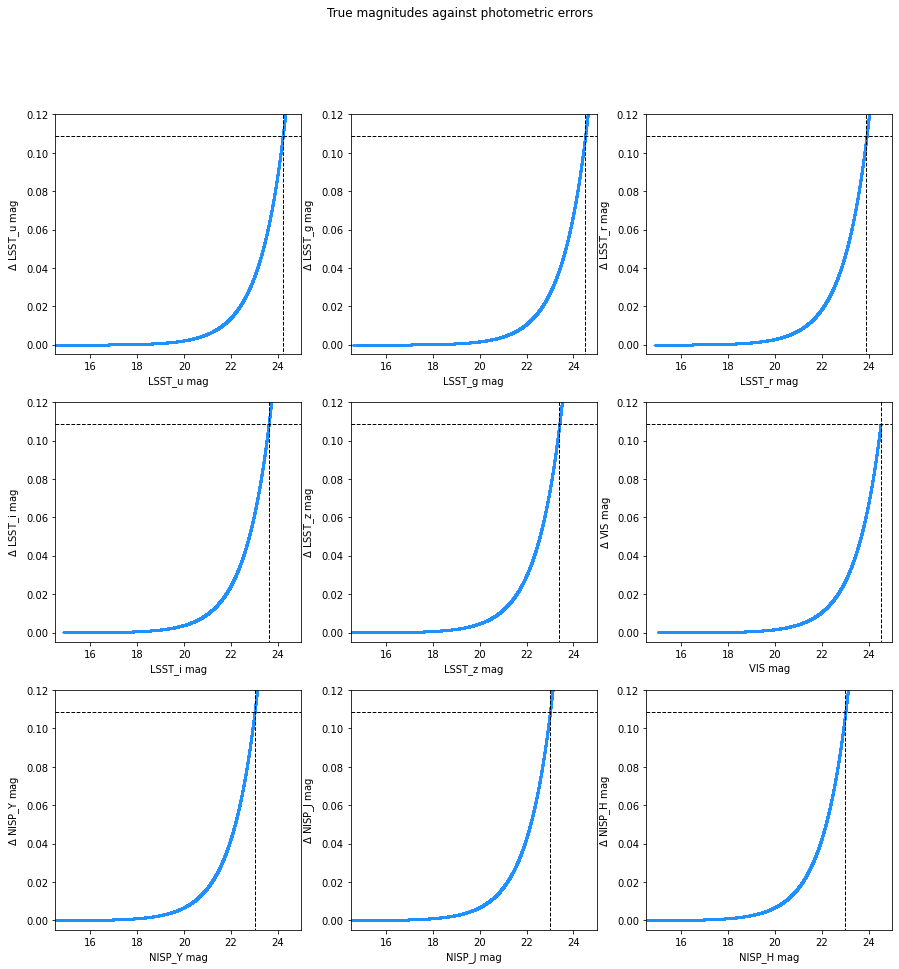

In [199]:
plt.figure(figsize=(15,15))
plt.suptitle('True magnitudes against photometric errors')
plt.subplot(331)
plt.scatter(observable_df['LSST_u'], phot_errors_df['delta_LSST_u'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_u'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_u mag')
plt.ylabel(r'$\Delta$ LSST_u mag')

plt.subplot(332)
plt.scatter(observable_df['LSST_g'], phot_errors_df['delta_LSST_g'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_g'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_g mag')
plt.ylabel(r'$\Delta$ LSST_g mag')

plt.subplot(333)
plt.scatter(observable_df['LSST_r'], phot_errors_df['delta_LSST_r'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_r'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_r mag')
plt.ylabel(r'$\Delta$ LSST_r mag')

plt.subplot(334)
plt.scatter(observable_df['LSST_i'], phot_errors_df['delta_LSST_i'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_i'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_i mag')
plt.ylabel(r'$\Delta$ LSST_i mag')

plt.subplot(335)
plt.scatter(observable_df['LSST_z'], phot_errors_df['delta_LSST_z'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_z'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_z mag')
plt.ylabel(r'$\Delta$ LSST_z mag')

plt.subplot(336)
plt.scatter(observable_df['VIS'], phot_errors_df['delta_VIS'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['VIS'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('VIS mag')
plt.ylabel(r'$\Delta$ VIS mag')

plt.subplot(337)
plt.scatter(observable_df['NISP_Y'], phot_errors_df['delta_NISP_Y'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_Y'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_Y mag')
plt.ylabel(r'$\Delta$ NISP_Y mag')

plt.subplot(338)
plt.scatter(observable_df['NISP_J'], phot_errors_df['delta_NISP_J'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_J'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_J mag')
plt.ylabel(r'$\Delta$ NISP_J mag')

plt.subplot(339)
plt.scatter(observable_df['NISP_H'], phot_errors_df['delta_NISP_H'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_H'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_H mag')
plt.ylabel(r'$\Delta$ NISP_H mag')

plt.show()
#plt.savefig('phot_errs_revised.png', format='png', dpi=250, facecolor='w')

In [ ]:
ughhhh = observable_df['tau/Gyr'].value_counts()
ughhhh

1.0     35814
0.1     34004
3.0     32294
10.0    27246
Name: tau/Gyr, dtype: int64

In [ ]:
taus = {'0.1 Gyr':ughhhh[0.1],
        '1 Gyr':ughhhh[1],
        '3 Gyr':ughhhh[3],
        '10 Gyr':ughhhh[10]}

In [ ]:
tau_names=list(taus.keys())
tau_counts=list(taus.values())

In [ ]:
zeds = observable_df['Z'].value_counts()
zeds

-0.3    51267
 0.3    46776
 0.0    31315
Name: Z, dtype: int64

In [ ]:
Z_dict = {'-0.3' : zeds[-0.3],
          '0.0' : zeds[0.0],
          '0.3' : zeds[0.3]}

In [ ]:
Z_names = list(Z_dict.keys())
Z_counts = list(Z_dict.values())

/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class w

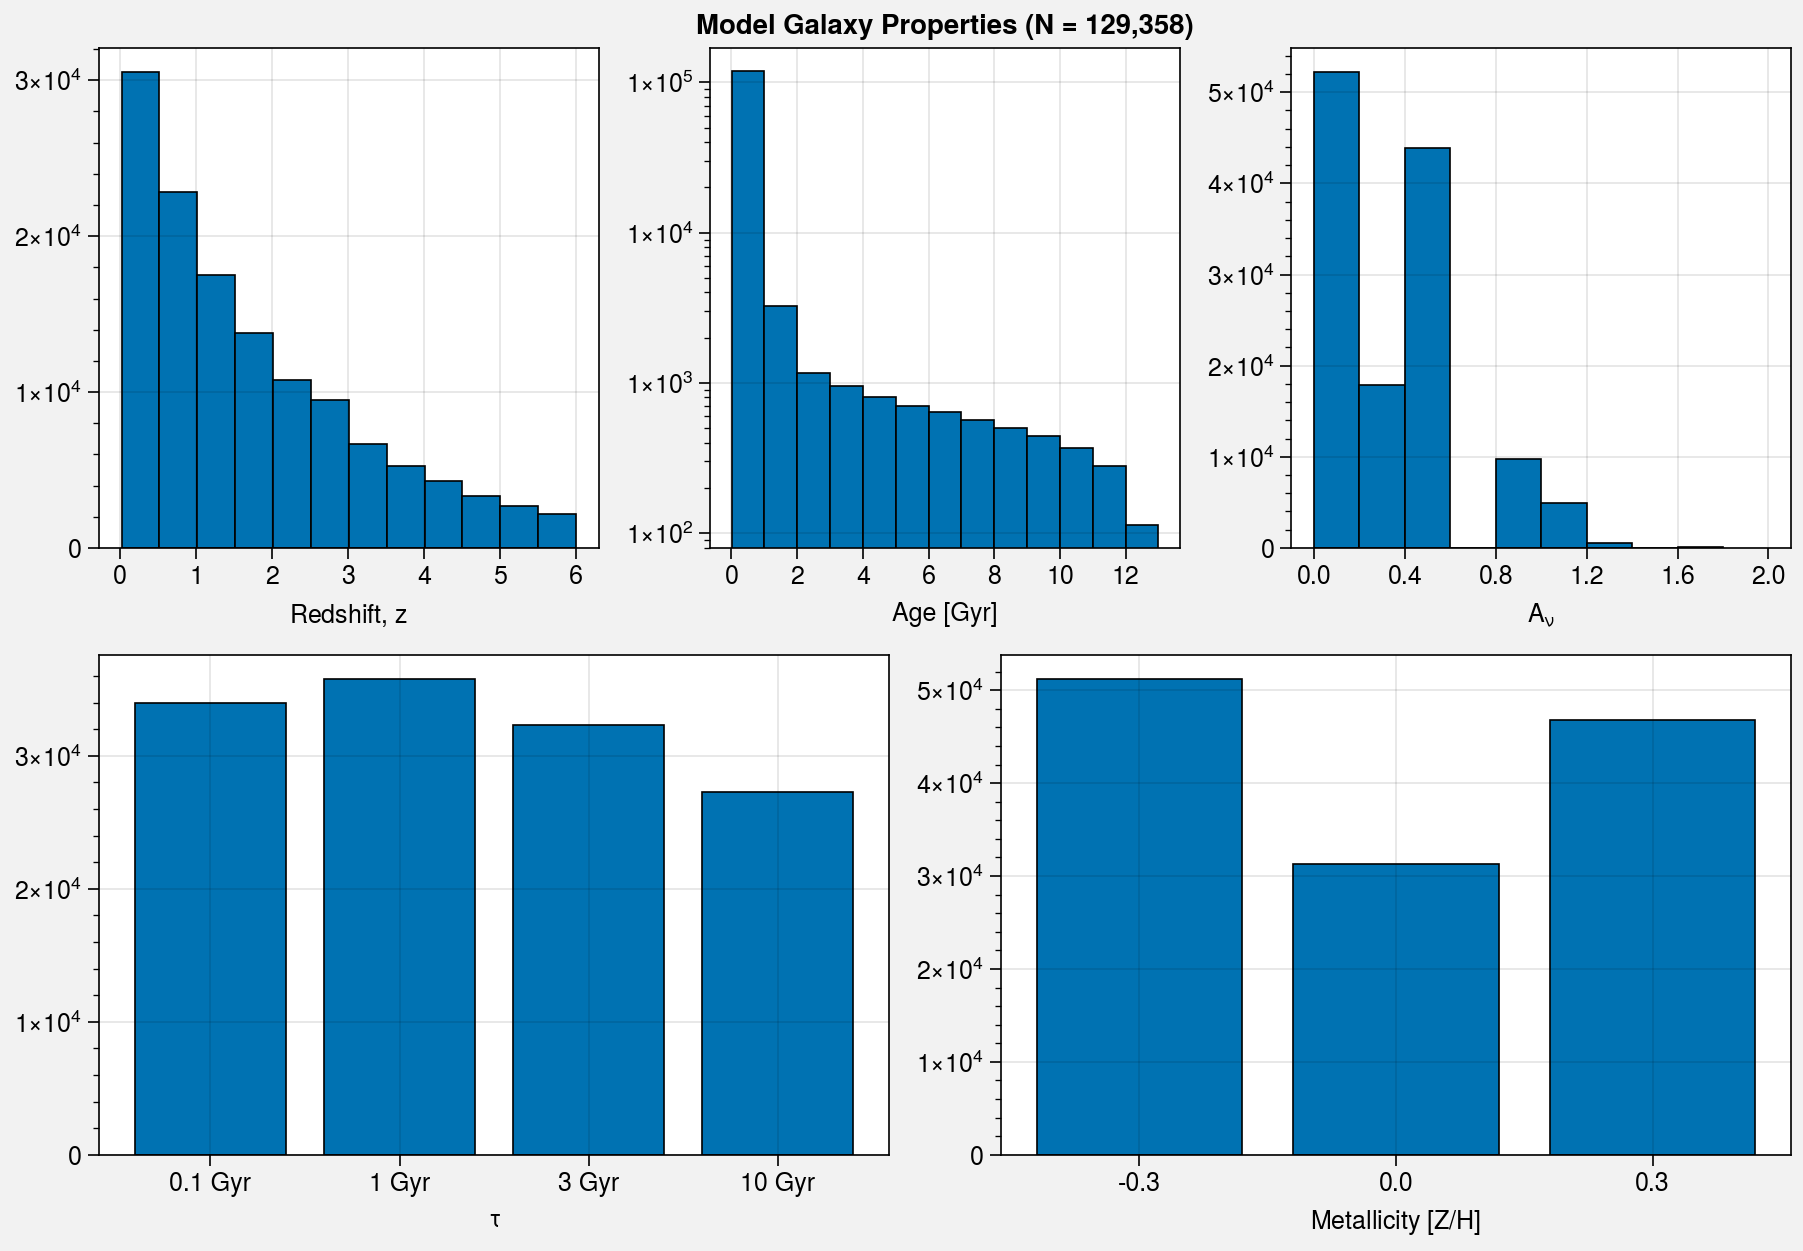

In [ ]:
# Automatic spacing for all margins and between all columns and rows
fig, axs = plot.subplots([[1 , 1, 2, 2, 3, 3],[4, 4, 4, 5, 5, 5]], axwidth=2.5, share=0)

axs[0].hist(observable_df['z'], bins=12)
axs[0].format(xlabel=(r'Redshift, $z$'), xlocator=1, xformatter='scalar', yformatter='sci', ylocator=10e3)

axs[1].hist(observable_df['t/Gyr'], bins=13)
axs[1].format(xlabel=r'Age [Gyr]', xlocator=2, xformatter='scalar', yscale='log', yformatter='sci')

axs[2].hist(observable_df['Av'], bins=9)
axs[2].format(xlabel=(r'$A_{\nu}$'), xlocator=.4, xformatter='scalar', yformatter='sci', xlim=(-0.1, 2.1))

axs[3].bar(tau_names, tau_counts)
axs[3].format(xlabel=r'$\tau$', yformatter='sci', ylocator=10e3)

axs[4].bar(Z_names, Z_counts)
axs[4].format(xlabel=r'Metallicity $[Z/H]$', yformatter='sci', ylocator=10e3)

axs.format(suptitle='Model Galaxy Properties (N = 129,358)')

#plt.savefig('properties.png', format='png', dpi=250, facecolor='w')

### Make catalogues for each of the 4 filter setups.

In [ ]:
sample_df = phot_errors_df.sample(5000, random_state=45).copy()

In [ ]:
sample_df.to_csv('euc_obs_n5000.csv')

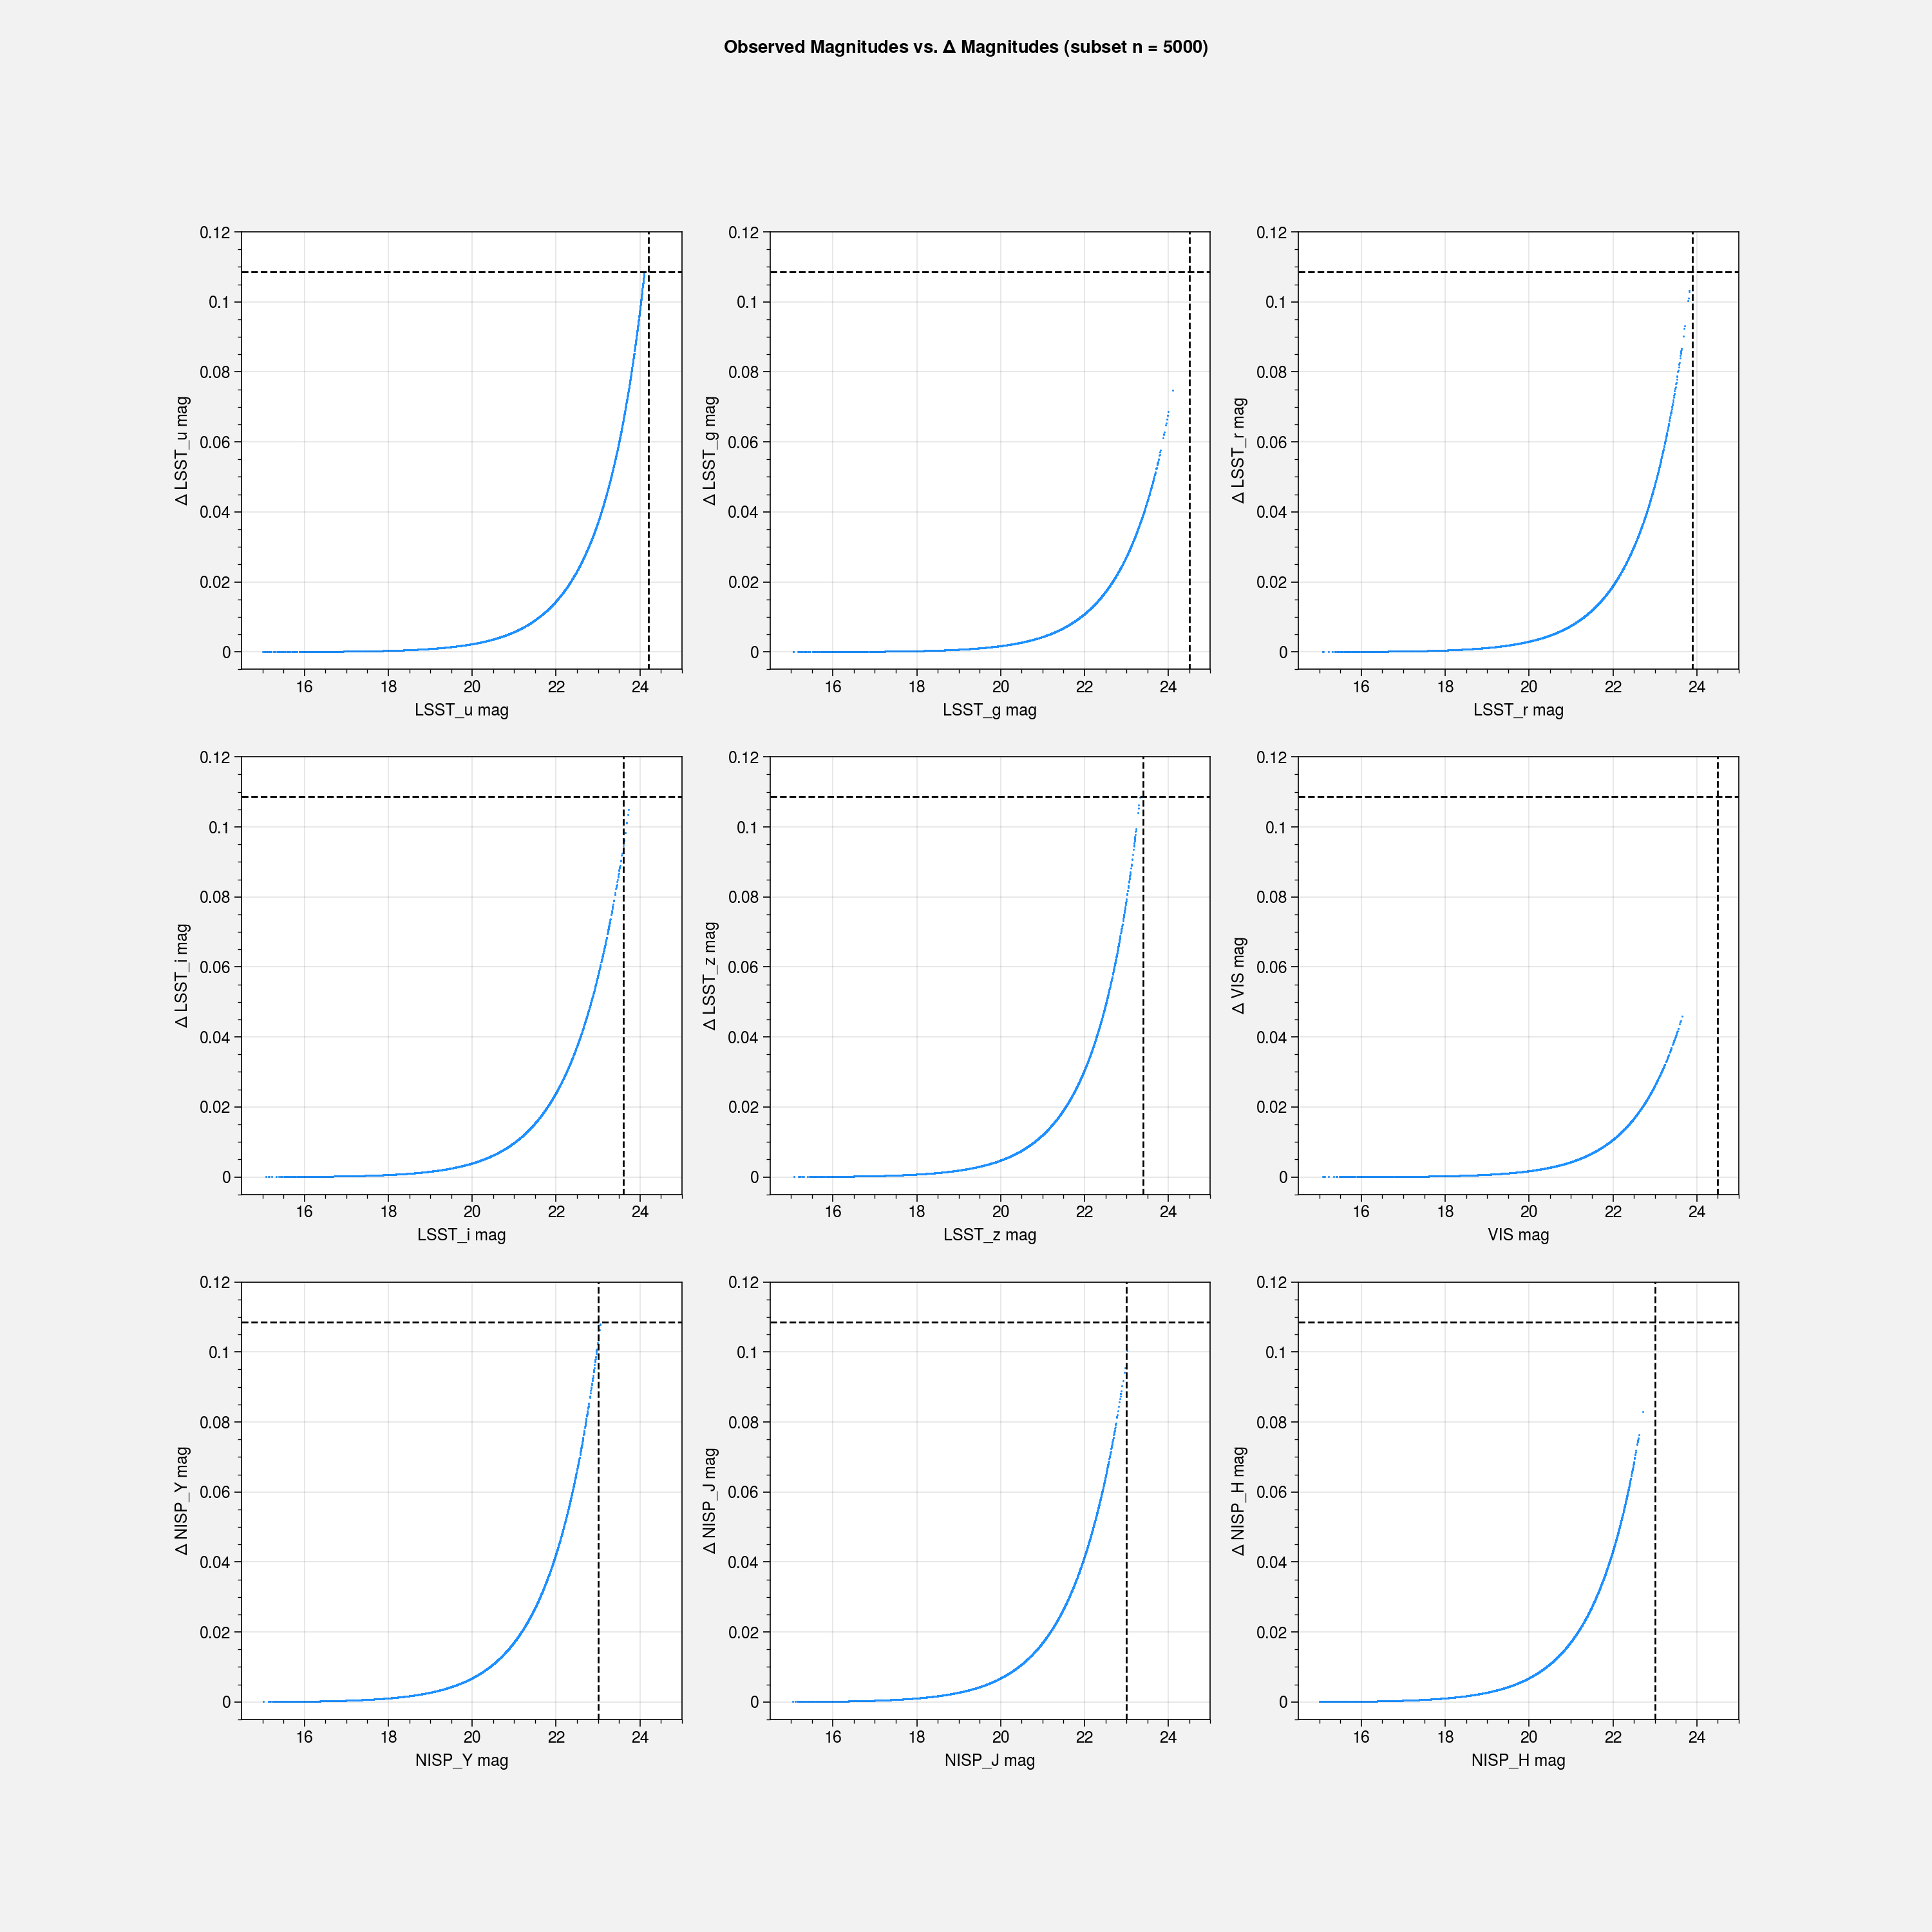

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle('Observed Magnitudes vs. $\Delta$ Magnitudes (subset n = 5000)')
plt.subplot(331)
plt.scatter(sample_df['LSST_u'], sample_df['delta_LSST_u'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_u'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_u mag')
plt.ylabel(r'$\Delta$ LSST_u mag')

plt.subplot(332)
plt.scatter(sample_df['LSST_g'], sample_df['delta_LSST_g'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_g'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_g mag')
plt.ylabel(r'$\Delta$ LSST_g mag')

plt.subplot(333)
plt.scatter(sample_df['LSST_r'], sample_df['delta_LSST_r'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_r'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_r mag')
plt.ylabel(r'$\Delta$ LSST_r mag')

plt.subplot(334)
plt.scatter(sample_df['LSST_i'], sample_df['delta_LSST_i'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_i'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_i mag')
plt.ylabel(r'$\Delta$ LSST_i mag')

plt.subplot(335)
plt.scatter(sample_df['LSST_z'], sample_df['delta_LSST_z'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['LSST_z'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('LSST_z mag')
plt.ylabel(r'$\Delta$ LSST_z mag')

plt.subplot(336)
plt.scatter(sample_df['VIS'], sample_df['delta_VIS'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['VIS'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('VIS mag')
plt.ylabel(r'$\Delta$ VIS mag')

plt.subplot(337)
plt.scatter(sample_df['NISP_Y'], sample_df['delta_NISP_Y'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_Y'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_Y mag')
plt.ylabel(r'$\Delta$ NISP_Y mag')

plt.subplot(338)
plt.scatter(sample_df['NISP_J'], sample_df['delta_NISP_J'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_J'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_J mag')
plt.ylabel(r'$\Delta$ NISP_J mag')

plt.subplot(339)
plt.scatter(sample_df['NISP_H'], sample_df['delta_NISP_H'], c='dodgerblue', marker='.', s=1)
plt.hlines(0.10857, 14.5, 25, color='k', ls='--', lw=1)
plt.vlines(limiting_mags['NISP_H'], -0.1, 0.2, color='k', ls='--', lw=1)
plt.xlim([14.5, 25])
plt.ylim([-0.005, 0.12])
plt.xlabel('NISP_H mag')
plt.ylabel(r'$\Delta$ NISP_H mag')

#plt.savefig('sample_phot_errs_revised.png', format='png', dpi=250, facecolor='w')

In [ ]:
sample_tau = sample_df['tau/Gyr'].value_counts()

In [ ]:
sample_taus = {'0.1 Gyr':sample_tau[0.1],
        '1 Gyr':sample_tau[1],
        '3 Gyr':sample_tau[3],
        '10 Gyr':sample_tau[10]}

In [ ]:
sample_tau_names=list(sample_taus.keys())
sample_tau_counts=list(sample_taus.values())

In [ ]:
sample_zeds = sample_df['Z'].value_counts()


In [ ]:
sample_Z_dict = {'-0.3' : sample_zeds[-0.3],
          '0.0' : sample_zeds[0.0],
          '0.3' : sample_zeds[0.3]}

In [ ]:
sample_Z_names = list(sample_Z_dict.keys())
sample_Z_counts = list(sample_Z_dict.values())

/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/chris/Documents/euclid/euclid_env/lib/python3.8/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class w

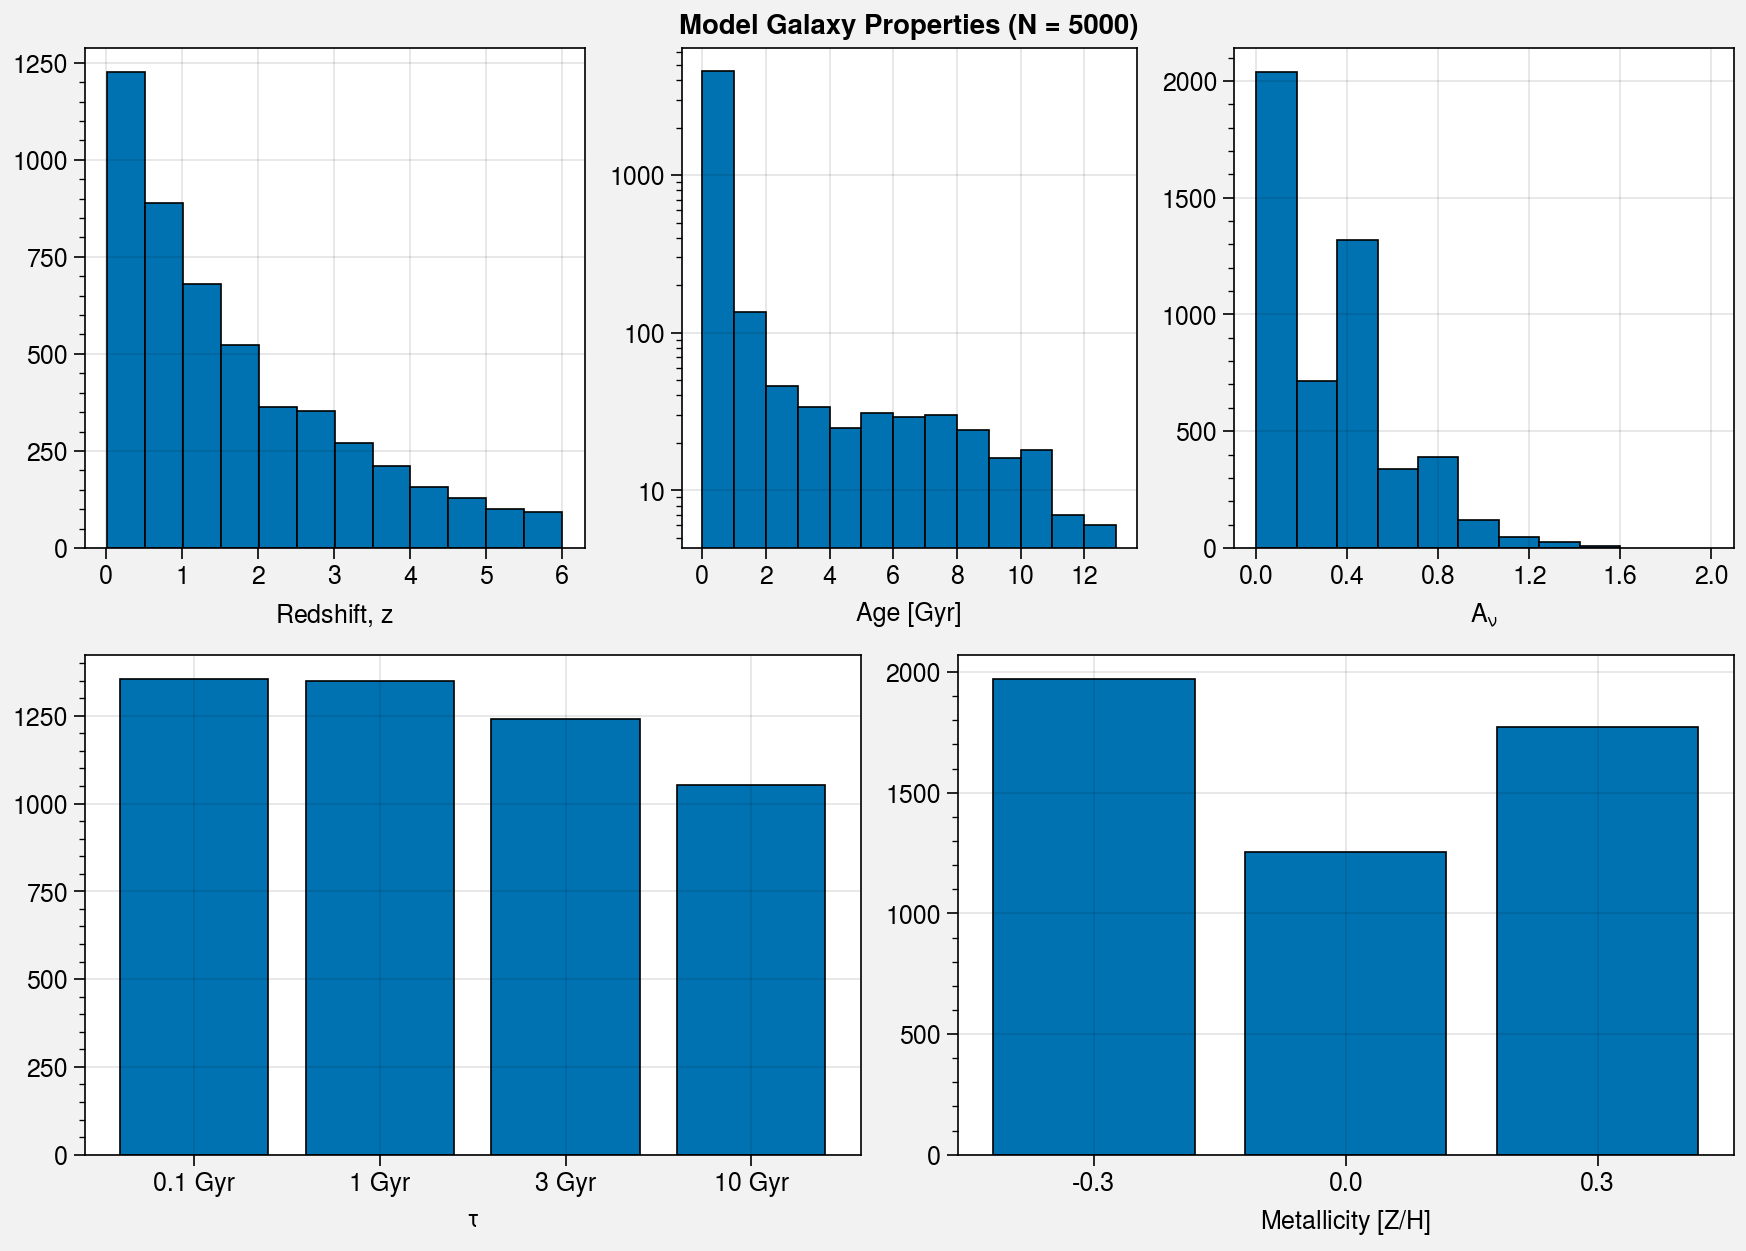

In [ ]:
# Automatic spacing for all margins and between all columns and rows
fig, axs = plot.subplots([[1 , 1, 2, 2, 3, 3],[4, 4, 4, 5, 5, 5]], axwidth=2.5, share=0)

axs[0].hist(sample_df['z'], bins=12)
axs[0].format(xlabel=(r'Redshift, $z$'), xlocator=1, xformatter='scalar', yformatter='scalar', ylocator=250)

axs[1].hist(sample_df['t/Gyr'], bins=13)
axs[1].format(xlabel=r'Age [Gyr]', xlocator=2, xformatter='scalar', yscale='log', yformatter='scalar')

axs[2].hist(sample_df['Av'], bins=9)
axs[2].format(xlabel=(r'$A_{\nu}$'), xlocator=.4, xformatter='scalar', yformatter='scalar', xlim=(-0.1, 2.1), ylocator=500)

axs[3].bar(sample_tau_names, sample_tau_counts)
axs[3].format(xlabel=r'$\tau$', yformatter='scalar', ylocator=250)

axs[4].bar(sample_Z_names, sample_Z_counts)
axs[4].format(xlabel=r'Metallicity $[Z/H]$', yformatter='scalar', ylocator=500)

axs.format(suptitle='Model Galaxy Properties (N = 5000)')

#plt.savefig('sample_properties.png', format='png', dpi=250, facecolor='w')

In [ ]:
sample_df.columns

Index(['For_key_ID', 'LSST_u', 'LSST_g', 'LSST_r', 'LSST_i', 'LSST_z', 'VIS',
       'NISP_Y', 'NISP_J', 'NISP_H', 'z', 't/Gyr', 'M*', 'M_initial', 'Z',
       'SFH', 'tau/Gyr', 'Av_law', 'Av', 't_l', 'physical', 'delta_LSST_u',
       'delta_LSST_g', 'delta_LSST_r', 'delta_LSST_i', 'delta_LSST_z',
       'delta_VIS', 'delta_NISP_Y', 'delta_NISP_J', 'delta_NISP_H'],
      dtype='object')

In [ ]:
full_filts = sample_df.drop(columns=['For_key_ID', 'z', 't/Gyr', 'M*', 'M_initial', 'Z',
       'SFH', 'tau/Gyr', 'Av_law', 'Av', 't_l', 'physical'])

In [ ]:
full_filts['z'] = sample_df['z']

In [ ]:
full_filts.insert(loc=0, column='ID', value=np.arange(1, len(full_filts)+1))

In [ ]:
full_filts

,ID,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,delta_LSST_u,delta_LSST_g,delta_LSST_r,delta_LSST_i,delta_LSST_z,delta_VIS,delta_NISP_Y,delta_NISP_J,delta_NISP_H,z
243028,1,20.244440,18.886510,18.101565,17.601337,17.231903,17.754681,16.725266,16.342438,15.969696,0.002848,0.000617,0.000520,0.000433,0.000370,0.000217,0.000336,0.000236,0.000167,0.09
272429,2,22.922050,22.920297,22.505370,21.608455,21.387868,21.934957,21.269565,21.125713,20.883410,0.034454,0.025333,0.030269,0.016944,0.017233,0.010060,0.021838,0.018979,0.015461,0.81
119174,3,19.638878,19.435416,18.876824,18.746329,18.656397,18.802099,18.482038,18.057554,17.808377,0.001629,0.001023,0.001063,0.001240,0.001376,0.000570,0.001691,0.001144,0.000910,0.41
48529,4,23.488363,22.561686,21.168420,21.046725,21.121668,21.130198,21.104136,21.204350,21.406068,0.059249,0.018209,0.008790,0.010194,0.013449,0.004835,0.018778,0.020378,0.025027,4.69
267381,5,22.465750,21.333292,20.499270,20.591670,20.732313,20.568976,20.829657,21.051244,21.337007,0.022404,0.005875,0.004742,0.006736,0.009368,0.002893,0.014611,0.017742,0.023484,4.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150350,4996,21.952710,21.777439,21.042969,20.805630,20.593813,20.898973,20.284398,19.831802,19.531988,0.013866,0.008844,0.007829,0.008187,0.008239,0.003913,0.008866,0.005836,0.004452,0.46
82351,4997,20.020536,20.057328,19.968546,19.634139,19.601464,19.791383,19.528194,19.414522,19.243114,0.002316,0.001814,0.002907,0.002804,0.003291,0.001417,0.004427,0.003980,0.003412,0.73
224947,4998,19.141538,18.642908,18.250145,18.126033,18.029581,18.173260,17.869777,17.733056,17.596281,0.001030,0.000493,0.000597,0.000701,0.000772,0.000320,0.000963,0.000848,0.000749,0.22
191274,4999,21.007024,21.142577,21.117026,20.717185,20.699338,20.906722,20.661016,20.502824,20.181196,0.005763,0.004929,0.008383,0.007553,0.009086,0.003941,0.012521,0.010777,0.008096,0.75


In [ ]:
np.savetxt(r'all_5000.cat', full_filts.values, fmt=' '.join(['%i'] + ['%1.4f']*19))

In [ ]:
no_u_cat = full_filts.drop(columns=['LSST_u', 'delta_LSST_u'])

In [ ]:
np.savetxt(r'no_u_5000.cat', no_u_cat.values, fmt=' '.join(['%i'] + ['%1.4f']*17))

In [ ]:
gnd_cat = full_filts.drop(columns=['VIS',
       'NISP_Y', 'NISP_J', 'NISP_H','delta_VIS', 'delta_NISP_Y', 'delta_NISP_J', 'delta_NISP_H'])

In [ ]:
np.savetxt(r'gnd_5000.cat', gnd_cat.values, fmt=' '.join(['%i'] + ['%1.4f']*11))

In [ ]:
euc_cat = full_filts.drop(columns=['LSST_u', 'LSST_g', 'LSST_r', 'LSST_i', 'LSST_z', 'delta_LSST_u',
       'delta_LSST_g', 'delta_LSST_r', 'delta_LSST_i', 'delta_LSST_z'])

In [ ]:
np.savetxt(r'euc_5000.cat', euc_cat.values, fmt=' '.join(['%i'] + ['%1.4f']*9))